In [ ]:
#################################
# RUN ME FIRST TO LOAD FILES    #
#################################

!git clone https://github.com/GSU-Analytics/assessment

# Introduction

Welcome to the skill assessment notebook. These exercises evaluate your proficiency in SQL, Python, and data analysis.

You can skip questions without penalty. Use resources like Google, code samples, or AI tools, but be ready to discuss your answers and approach during the interview.

For questions, contact Isaac at ikerson@gsu.edu. Once finished, save the notebook and share the link with Isaac. We look forward to seeing your work!

# Overview of `university.db`

The `university.db` database is a mock SQLite database designed to simulate a collection of university data tables. It contains information about students, instructors, courses, grades, and more. This database is structured to provide realistic data for demonstrating data analysis skills.

## Database Schema

The database consists of the following tables:

### 1. **`student_main`**
- **Description**: Stores detailed information about students enrolled at the university.
- **Key Columns**:
  - `student_id`: Unique identifier for each student (primary key).
  - `last_name`, `first_name`: Student's name details.
  - `gender`, `ethnicity`: Demographic information.
  - `address`, `us_citizen`, `us_resident`, `state_resident`: Residential and citizenship details.
  - `pell_recipient`, `us_veteran`: Indicators for Pell Grant recipients and veteran status.
- **Relationships**:
  - Linked to `student_grades` through `student_id`.
  - Linked to `student_attributes` through `student_id`.

### 2. **`instructor_main`**
- **Description**: Contains information about university instructors.
- **Key Columns**:
  - `employee_id`: Unique identifier for each instructor (primary key).
  - `faculty_code`: Foreign key referencing `faculty_code_validation_table.faculty_code`, representing the faculty type (e.g., tenure-track, adjunct).
  - `full_time_indicator`: Binary indicator for full-time (1) or part-time (0) status.
- **Relationships**:
  - Linked to `courses` through `employee_id`.

### 3. **`faculty_code_validation_table`**
- **Description**: A lookup table that validates and describes faculty codes.
- **Key Columns**:
  - `faculty_code`: Three-letter code for faculty type (primary key).
  - `faculty_description`: Description of the faculty type.

### 4. **`courses`**
- **Description**: Represents the courses offered at the university.
- **Key Columns**:
  - `id`: Unique identifier for each course (primary key).
  - `term_code`: Academic term (e.g., Fall 2023).
  - `major_abbreviation`: Department offering the course (e.g., MATH, BIO).
  - `course_number`, `section_code`: Course and section identifiers.
  - `location_code`: Location where the course is held.
  - `delivery_code`: Mode of instruction (In-person, Hybrid, Online).
  - `credits`: Number of credit hours assigned to the course (1–3).
  - `employee_id`: Foreign key referencing `instructor_main.employee_id`, indicating the instructor teaching the course.
- **Relationships**:
  - Linked to `instructor_main` through `employee_id`.
  - Linked to `student_grades` through `section_code`.

### 5. **`student_grades`**
- **Description**: Records students' grades for courses.
- **Key Columns**:
  - `id`: Unique identifier for each grade record (primary key).
  - `student_id`: Foreign key referencing `student_main.student_id`.
  - `term_code`: Term during which the grade was earned.
  - `section_code`: Foreign key referencing `courses.section_code`.
  - `grade`: Grade received for the course.
  - `withdrawal`: Binary indicator for course withdrawal (1 for withdrawal, 0 otherwise).
- **Relationships**:
  - Linked to `student_main` through `student_id`.
  - Linked to `courses` through `section_code`.

### 6. **`student_attributes`**
- **Description**: Tracks additional attributes assigned to students for specific terms.
- **Key Columns**:
  - `id`: Unique identifier for each attribute record (primary key).
  - `student_id`: Foreign key referencing `student_main.student_id`.
  - `term_code`: Academic term for which the attribute applies.
  - `attribute_code`: Foreign key referencing `attribute_code_validation_table.attribute_code`, indicating the assigned attribute (e.g., ESL, Honors).
- **Relationships**:
  - Linked to `student_main` through `student_id`.
  - Linked to `attribute_code_validation_table` through `attribute_code`.

### 7. **`attribute_code_validation_table`**
- **Description**: A lookup table that validates and describes student attribute codes.
- **Key Columns**:
  - `attribute_code`: Three-letter code for student attributes (primary key).
  - `attribute_description`: Description of the attribute.

## Relationships Between Tables

The tables and relationships in the `university.db` database detailed in the following schema diagram:

![University Database Schema](schema_diagram.png)


### Introduction to Pandas and the `read_sql` Method

**Pandas** is a powerful Python library for data manipulation and analysis. It provides easy-to-use data structures like DataFrames and Series, which allow for efficient handling and processing of structured data. Pandas is widely used in data science, machine learning, and data analytics.

One of Pandas' strengths is its ability to seamlessly interact with SQL databases, enabling you to load query results directly into a DataFrame using the `read_sql` method. This method simplifies the process of querying databases and analyzing the results in Python.

#### What is `read_sql`?
The `pandas.read_sql()` method allows you to execute SQL queries on a database and retrieve the results as a Pandas DataFrame. It can be used to:
1. Query data from a database.
2. Load entire tables into a DataFrame.
3. Perform complex SQL queries and integrate results with Python-based analysis.

#### Basic Syntax
```python
pandas.read_sql(sql, con, index_col=None, coerce_float=True, params=None)
```

- **`sql`**: The SQL query or table name as a string.
- **`con`**: A database connection object (e.g., SQLAlchemy engine).
- **`index_col`**: Column(s) to set as the DataFrame index (optional).
- **`params`**: Parameters to pass for parameterized queries (optional).

#### Benefits of Using `read_sql`
- Directly integrates SQL querying into your Python workflow.
- Returns a DataFrame, which is ideal for further analysis and visualization in Python.
- Supports parameterized queries for added security and flexibility.

#### Documentation
For a complete guide to the `read_sql` method, visit the [Pandas Documentation](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.read_sql.html). 

This page provides detailed explanations, parameters, and examples to help you make the most of this method.

In [2]:
# Run the following cell for an example how to use `pd.read_sql`

import pandas as pd
from sqlalchemy import create_engine

# Define the database URL
DATABASE_URL = "sqlite:///university.db"

# Create the engine to connect to the database
engine = create_engine(DATABASE_URL)

# Test the connection by running a query to get table names
query = "SELECT name FROM sqlite_master where type = 'table';"
tables = pd.read_sql(query, engine)

# Print the list of tables
print("Connected to the database!")
print("Tables in the database:")
display(tables)

Connected to the database!
Tables in the database:


,name
0,student_main
1,faculty_code_validation_table
2,attribute_code_validation_table
3,instructor_main
4,student_attributes
5,courses
6,student_grades


### Count the Total Number of Students

#### Directions:
Write a SQL query in the space provided below to count the total number of students in the database. Use the `student_main` table for this task. Then run the cell to execute your query and display the result.

In [5]:
## Complete the query to get the number of students in the `students` table
student_count_query = """select count(student_id) from student_main"""

## Do not edit the code below
student_count_df = pd.read_sql(student_count_query, engine)

# Display the result
display(student_count_df)

,count(student_id)
0,10000


### Get the Records of Pell Grant Recipients with an Email and a Last Name Starting with "A"

#### Directions:
Write a SQL query in the space provided below to retrieve the records of students who are Pell Grant recipients and have an email value as well a last name starting with the letter "A". Use the `student_main` table and filter on the `last_name`, `email`, and `pell_recipient` columns. Return the `student_id`, `last_name`, `first_name`, `email`, and `address` for each student. Then run the cell to execute your query and display the results.

In [10]:
## Complete the query to get Pell Grant Recipients with a Last Name Starting with "A"
pell_grant_query = """select student_id, last_name, first_name, email, address from student_main where last_name like 'A%' and email like 'A%' and pell_recipient='Y'"""
#####w
## Do not edit the code below
pell_grant_df = pd.read_sql(pell_grant_query, engine)

# Display the result
display(pell_grant_df.head())

,student_id,last_name,first_name,email,address
0,153572390,Andersen,Heather,amy71@example.com,"49215 Garrett Ways Apt. 340, Lake Reneebury, N..."
1,604220771,Ashley,Kelly,agalloway@example.com,"756 King Turnpike, Reyesfurt, SC 75831"
2,556990919,Atkins,Linda,ashleynguyen@example.net,"25585 Larry Burgs, South Elizabeth, PR 95359"


### Get the Average Number of Credits Students Took During Each Term in the Database

#### Directions:
Write a SQL query in the space provided below to calculate the average number of credits students took during each term. Use the `courses` table for this task. Then run the cell to execute your query and display the result.

In [14]:
## Complete the query to get the average number of credits students took during each term
average_credits_query = """select sg.term_code , avg(c.credits) from courses c left join student_grades sg on c.section_code=sg.section_code group by sg.term_code order by sg.term_code desc """

## Do not edit the code below
average_credits_df = pd.read_sql(average_credits_query, engine)

# Display the result
display(average_credits_df)

,term_code,avg(c.credits)
0,202408,1.387733
1,202405,1.561001
2,202401,2.110108
3,202308,1.595836
4,202305,1.582538
5,202301,1.997512
6,202208,2.088479
7,202205,1.832596
8,202201,2.001798
9,202108,2.109558


## Create a Bar Plot of Average Credits Over Time

#### Directions:
Using the results from the previous query, create a bar plot showing the average credits taken over time. The x-axis should represent the term code, and the y-axis should display the average credits. Label the axes appropriately and provide a title for the plot. You can use any Python data visualization library you prefer (e.g., Matplotlib, Seaborn, etc.).

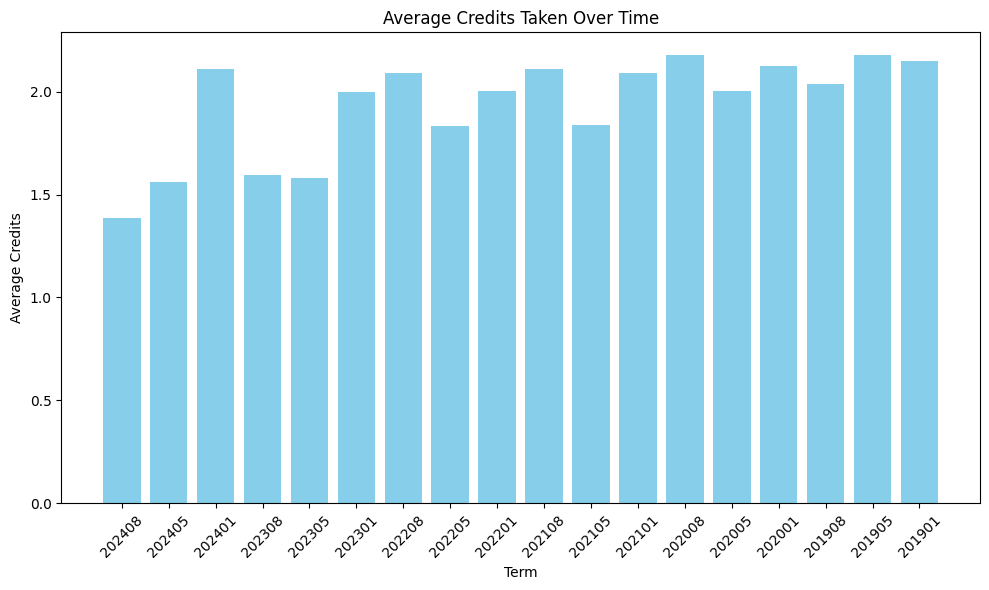

In [17]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 6))
plt.bar(average_credits_df['term_code'], average_credits_df['avg(c.credits)'], color='skyblue')
plt.xlabel('Term')
plt.ylabel('Average Credits')
plt.title('Average Credits Taken Over Time')
plt.xticks(rotation=45) 
plt.tight_layout()  
plt.show()

# Open-ended Analysis

### Directions

In this section, please explore the `university.db` database and conduct any additional analyses you find interesting. This is an opportunity to showcase your skills, creativity, and analytical thinking. Feel free to ask questions, propose new analyses, or present your findings in any format you prefer (e.g., tables, charts, written summaries).

You can use SQL queries, Python code, data visualizations, or any other tools you find suitable for the task. Your analysis can cover topics like student performance, course enrollment trends, faculty characteristics, or any other aspect of the university data.

### Possible Questions for Analysis

Below are some example questions you might explore. They are only suggestions. You are **not** obligated to answer all or any of them. Pick one or come up with your own question to answer.

#### Grade Analysis
- Are there particular **courses**, **instructors**, or **student populations** that have significant deviations in outcomes?
- How do **average grades** differ across terms, courses, or majors?
- What is the distribution of grades for students in honors (HNR) or English as a Second Language (ESL) programs?

#### Enrollment Patterns
- What are the **enrollment patterns** for courses by day and/or time?
- Which courses have the **highest or lowest enrollments** across all terms?
- How do enrollments differ across **delivery modes** (in-person, hybrid, online)?

#### Instructor Impact
- Do specific instructors have consistently **higher or lower average grades** in their courses?
- How do full-time versus part-time instructors differ in terms of course outcomes?

#### Term Trends
- Are there any **seasonal trends** in course enrollment or performance (e.g., winter vs. summer)?
- What is the average number of courses taken by students in each term?

#### Student Demographics
- What percentage of students are enrolled in **honors** or **athletic programs** each term?
- How does student performance differ by **gender** or **ethnicity**?

#### Course Specific Analysis
- What is the **most common combination** of courses taken by students in a given term?
- How do **drop/withdrawal rates** vary by course, instructor, or term?

In [ ]:
##########################
#  Write your code here  #
##########################

In [ ]:
#course section avg grade
grade = """SELECT 
    c.course_number, 
    c.section_code, 
    AVG(sg.grade) AS average_grade
FROM 
    student_grades sg
JOIN 
    courses c ON sg.section_code = c.section_code
JOIN 
    instructor_main i ON c.employee_id = i.employee_id
GROUP BY 
    c.course_number, c.section_code
HAVING 
    AVG(sg.grade) < (SELECT AVG(grade) FROM student_grades)
     order by average_grade desc """

## Do not edit the code below
grade_df1 = pd.read_sql(grade, engine)

# Display the result
display(grade_df1)

##insignificant

,course_number,section_code,average_grade
0,3001,41467,2.874012
1,3001,54956,2.873849
2,3200,63154,2.872287
3,2060,60554,2.872262
4,3200,95443,2.872221
...,...,...,...
98,2050,38852,2.784042
99,2060,57228,2.779386
100,4500,21039,2.758105
101,2060,28528,2.749344


In [12]:
#course section avg grade
grade2 = """SELECT 
    c.course_number, 
    AVG(sg.grade) AS average_grade
FROM 
    student_grades sg
JOIN 
    courses c ON sg.section_code = c.section_code
JOIN 
    instructor_main i ON c.employee_id = i.employee_id
GROUP BY 
    c.course_number
HAVING 
    AVG(sg.grade) < (SELECT AVG(grade) FROM student_grades)
     order by average_grade desc """

## Do not edit the code below
grade_df2 = pd.read_sql(grade2, engine)

# Display the result
display(grade_df2)

##insignificant

,course_number,average_grade
0,1001,2.871518
1,2060,2.868916
2,1100,2.866668
3,2050,2.861155
4,4500,2.856647


In [13]:
#term major avg grade
major1 = """SELECT 
    c.term_code, 
    c.major_abbreviation, 
    AVG(sg.grade) AS average_grade
FROM 
    student_grades sg
JOIN 
    courses c ON sg.section_code = c.section_code
GROUP BY 
    c.term_code, c.major_abbreviation; """

## Do not edit the code below
major_df1 = pd.read_sql(major1, engine)

# Display the result
display(major_df1)

##insignificant

,term_code,major_abbreviation,average_grade
0,201901,ART,2.864940
1,201901,BIO,2.888176
2,201901,ENG,2.828815
3,201901,MATH,2.855107
4,201905,ART,2.884213
...,...,...,...
113,202405,PSY,2.854570
114,202408,CS,2.831597
115,202408,ENG,2.867516
116,202408,MATH,2.849666


In [14]:
#term major avg grade
major2 = """SELECT  
    c.major_abbreviation, 
    AVG(sg.grade) AS average_grade
FROM 
    student_grades sg
JOIN 
    courses c ON sg.section_code = c.section_code
GROUP BY 
 c.major_abbreviation; """

## Do not edit the code below
major_df2 = pd.read_sql(major2, engine)

# Display the result
display(major_df2)

##insignificant

,major_abbreviation,average_grade
0,ART,2.891672
1,BIO,2.880224
2,CHEM,2.866126
3,CS,2.861398
4,ECON,2.882415
5,ENG,2.867318
6,HIST,2.886670
7,MATH,2.875759
8,PHYS,2.878659
9,PSY,2.860242


In [31]:
#term  avg grade
term1 = """SELECT  
    c.term_code, 
    AVG(sg.grade) AS average_grade,
    count(distinct sg.student_id)
FROM 
    student_grades sg
JOIN 
    courses c ON sg.section_code = c.section_code
GROUP BY 
 c.term_code 
 order by c.term_code asc; """

## Do not edit the code below
term_df1 = pd.read_sql(term1, engine)

# Display the result
display(term_df1)


,term_code,average_grade,count(distinct sg.student_id)
0,201901,2.858380,910
1,201905,2.869610,923
2,201908,2.872978,1124
3,202001,2.882989,897
4,202005,2.888181,918
5,202008,2.894325,1039
6,202101,2.858366,915
7,202105,2.880609,957
8,202108,2.902587,866
9,202201,2.874686,932


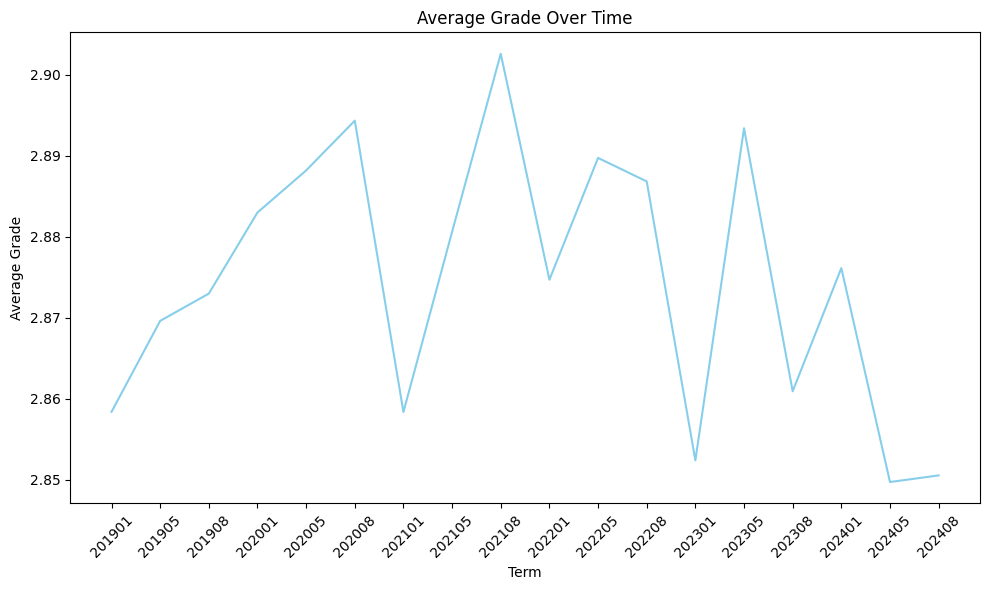

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 6))
plt.plot(term_df1['term_code'], term_df1['average_grade'], color='skyblue')
plt.xlabel('Term')
plt.ylabel('Average Grade')
plt.title('Average Grade Over Time')
plt.xticks(rotation=45) 
plt.tight_layout()  
plt.show()

## why is there a dip every 4-6 semesters, are the courses being updated every 4-5 semesters or the difficulty level increasing?

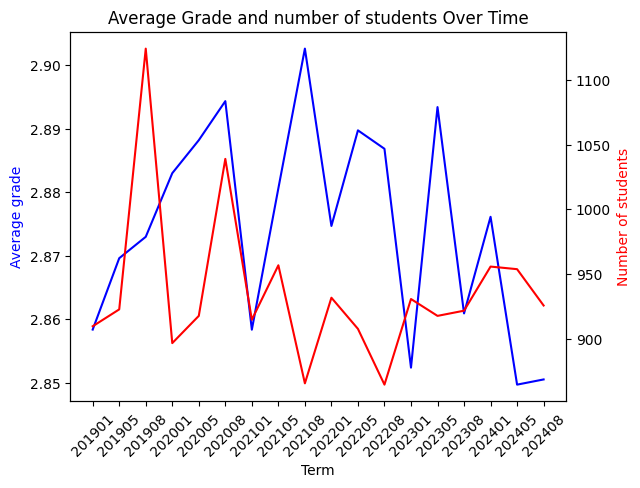

In [ ]:
fig, ax1=plt.subplots()
ax1.plot(term_df1['term_code'],  term_df1['average_grade'], 'b-', label="Average Grade")
ax1.set_xlabel("Term")
ax1.set_ylabel("Average grade", color='b')
plt.xticks(rotation=45) 
ax2=ax1.twinx()
ax2.plot(term_df1['term_code'],  term_df1['count(distinct sg.student_id)'], 'r-', label="Number of students")
ax2.set_ylabel("Number of students", color='r')
plt.title('Average Grade and number of students Over Time')
plt.show()

#in 2020 initial covid period grades and enrollment dropped and during the next 2 ears grade increased and enrollment dropped
#post covid grades kept fluctuating while enrollments struggle to improve as pre covid

In [ ]:
#term  avg grade
hnresl = """SELECT 
    sa.attribute_code,avg(sg.grade), 
    COUNT(*) AS count
FROM 
    student_grades sg
JOIN 
    student_attributes sa ON sg.student_id = sa.student_id
WHERE 
    sa.attribute_code IN ('HNR', 'ESL')
GROUP BY 
    sa.attribute_code; """

## Do not edit the code below
hnresl_df1 = pd.read_sql(hnresl, engine)

# Display the result
display(hnresl_df1)


,attribute_code,avg(sg.grade),count
0,ESL,2.615535,17596
1,HNR,2.737785,17615


In [ ]:
#attribute  avg grade
att = """SELECT 
    sa.attribute_code,avg(sg.grade), 
    COUNT(*) AS count
FROM 
    student_grades sg
JOIN 
    student_attributes sa ON sg.student_id = sa.student_id

GROUP BY 
    sa.attribute_code; """

## Do not edit the code below
att_df1 = pd.read_sql(att, engine)

# Display the result
display(att_df1)

##hnr and esl have highest number of students enrolled but least (ESL) and highest (HNR) grade avgs 

,attribute_code,avg(sg.grade),count
0,ART,2.665270,14942
1,ATH,2.665155,14708
2,DIS,2.675239,14743
3,ESL,2.615535,17596
4,HNR,2.737785,17615
5,INT,2.677847,16311
6,MUS,2.661883,14790
7,SCI,2.668514,14907
8,TEC,2.668602,14890
9,TRF,2.681978,16568


In [ ]:
#attribute and gender avg grade
att = """SELECT 
    sa.attribute_code,sm.gender, avg(sg.grade), 
    COUNT(*) AS count
FROM 
    student_grades sg
JOIN 
    student_attributes sa ON sg.student_id = sa.student_id
LEFT JOIN 
    student_main sm on sm.student_id=sg.student_id
GROUP BY 
    sa.attribute_code, sm.gender; """

## Do not edit the code below
att_df1 = pd.read_sql(att, engine)

# Display the result
display(att_df1)


,attribute_code,gender,avg(sg.grade),count
0,ART,F,2.648334,7579
1,ART,M,2.676147,7099
2,ART,N,2.857627,264
3,ATH,F,2.620199,6928
4,ATH,M,2.688902,7497
5,ATH,N,3.129930,283
6,DIS,F,2.644565,7181
7,DIS,M,2.698184,7306
8,DIS,N,2.877687,256
9,ESL,F,2.589231,8672


In [ ]:
#course enrollment numbers per course
cn = """SELECT 
    c.course_number, 
    COUNT(sg.student_id) AS enrollment_count
FROM 
    courses c
LEFT JOIN 
    student_grades sg ON c.section_code = sg.section_code
GROUP BY 
    c.course_number
ORDER BY 
    enrollment_count DESC; """

## Do not edit the code below
cn_df1 = pd.read_sql(cn, engine)

# Display the result
display(cn_df1)



,course_number,enrollment_count
0,2060,8972
1,3001,6971
2,1100,6171
3,4500,5757
4,1400,5152
5,3200,5141
6,2050,4390
7,1001,3986
8,4090,3869


In [ ]:
#delivery code Hybrid/In person/ Online vs enrollment
deln = """SELECT 
    c.delivery_code, 
    COUNT(sg.student_id) AS enrollment_count
FROM 
    courses c
LEFT JOIN 
    student_grades sg ON c.section_code = sg.section_code
GROUP BY 
    c.delivery_code; """

## Do not edit the code below
deln_df1 = pd.read_sql(deln, engine)

# Display the result
display(deln_df1)



,delivery_code,enrollment_count
0,H,16268
1,I,15581
2,O,18560


In [ ]:
#instructor ft indicator grade
ig = """SELECT 
    i.full_time_indicator, 
    AVG(sg.grade) AS average_grade
FROM 
    student_grades sg
JOIN 
    courses c ON sg.section_code = c.section_code
JOIN 
    instructor_main i ON c.employee_id = i.employee_id
GROUP BY 
    i.full_time_indicator; """

## Do not edit the code below
ig_df1 = pd.read_sql(ig, engine)

# Display the result
display(ig_df1)



,full_time_indicator,average_grade
0,0,2.876056
1,1,2.874233


In [ ]:
#instructor faculty code avg grade
igf = """SELECT 
    i.faculty_code, 
    AVG(sg.grade) AS average_grade
FROM 
    student_grades sg
JOIN 
    courses c ON sg.section_code = c.section_code
JOIN 
    instructor_main i ON c.employee_id = i.employee_id
GROUP BY 
    i.faculty_code; """

## Do not edit the code below
igf_df1 = pd.read_sql(igf, engine)

# Display the result
display(igf_df1)



,faculty_code,average_grade
0,ADJ,2.869773
1,INS,2.866763
2,LEC,2.880637
3,NTT,2.882346
4,RES,2.871816
5,TTR,2.875606


# Finish

### Submission Instructions
Once you are finished with the analysis, please save the notebook and email the link to Isaac at ikerson@gsu.edu. If you have any questions or need assistance, feel free to reach to contact Isaac.

We appreciate your time and effort. Good luck, and we look forward to discussing your work!